# GeoSampa e GeoProcessamento

Fernando Gomes

**Arquiteto, Urbanista, Analista de Sistemas e Programador, cursando mestrado em Engenharia de Transportes - Informações Espaciais, diretor de divisão ténica em GeoInfo/SMDU**

fernandogomes@prefeitura.sp.gov.br

## Agenda

* Um pouco além do GeoSampa que conhecemos
* Os papeis do GeoSampa
* Espacialização dos atendimento ao Cidadão, SP156
* LiDAR 3D, exemplo: Inventário para secretaria de Educação

In [3]:
print('Tudo com uma py(tada) de programação')

Tudo com uma py(tada) de programação


> por diversos motivos dentre eles ...
* estimula o compartilhamento do processo além do resultado
* grandes volumes de dados
* processamento distribuido ou em nuvem
* é performático
* potencial para disseminar o conhecimento

## O que é o GeoSampa?

* GeoSampa não é apenas um site
* Infraestrutura de dados
    * Bancos de dados PostGis, **GeoServer(s)**, Servidor de Arquivos, ETL (Extract, Transfer, Load)
* Softwares Livres ([Decreto Nº 58.447 de 1º de outubro de 2018](http://legislacao.prefeitura.sp.gov.br/leis/decreto-58447-de-1-de-outubro-de-2018))
* Equipe de pessoas GeoInfo e Intersecretarial
* Mais recentemente: Amazon OpenData (LiDAR 3D recente) e GitHub

### Estabelecido em Decreto

* [Decreto 57.770, de 03 de julho de 2017](http://legislacao.prefeitura.sp.gov.br/leis/decreto-57770-de-03-de-julho-de-2017/)
    * Estabelece O Sistema de Informações Geográficas do Município de São Paulo – SIG-SP
    * IMDE - Infra-estrutura Municipal de Dados Espaciais
    >SIG-SP é um sistema aberto, integrador, dinâmico e permanente, em constante adequação à realidade urbana e à evolução das ferramentas tecnológicas
    


### Serviços WEB

* Open Geospatial Consortium (OGC)
    * https://www.osgeo.org
    * Projetos, iniciativas, recursos e padrões
* Dentre os mais de 30 padrões, destacam-se:
    * WMS – Web Map Service
    * WFS – Web Feature Service
* http://wms.geosampa.prefeitura.sp.gov.br/geoserver/web/


In [48]:
from owslib.wms import WebMapService

In [49]:
wms = WebMapService('http://wms.geosampa.prefeitura.sp.gov.br/geoserver/geoportal/wms', version='1.3.0')

In [50]:
len(wms.contents)

242

In [51]:
list(wms.contents)

['Articulacao_Orto_2017',
 'Articulacao_Orto_MDC_2004',
 'geoportal:quadricula_orto_2004_E5000',
 'geoportal:quadricula_orto_2004_E1000',
 'Articulacao_SaraBrasil_1930',
 'geoportal:quadricula_SARA_1930_E20000',
 'geoportal:quadricula_SARA_1930_E5000',
 'geoportal:quadricula_SARA_1930_E1000',
 'Articulacao_foto_aerea_MDC_2004',
 'geoportal:quadricula_foto_aerea_2004_E1000',
 'geoportal:quadricula_foto_aerea_2004_E5000',
 'Carta_Geotecnica',
 'geoportal:geotecnica_poligono',
 'geoportal:geotecnica_linha',
 'geoportal:geotecnica_ponto',
 'Curva_Intermediaria',
 'geoportal:curva_intermediaria',
 'geoportal:curva_intermediaria_s',
 'Curva_Mestra',
 'geoportal:curva_mestra',
 'geoportal:curva_mestra_s',
 'Energia',
 'geoportal:linha_alta_tensao',
 'geoportal:torre_alta_tensao',
 'MapaBase_Politico',
 'MapaBase_Topografico',
 'Perimetro_Zoneamento',
 'geoportal:zoneamento_2004_urbana',
 'geoportal:zoneamento_2004_ambiental',
 'geoportal:zoneamento_2004_especial',
 'geoportal:zoneamento_2004_

In [52]:
print(wms.contents['distrito_municipal'].title)
print(wms.contents['distrito_municipal'].abstract)
print(wms.contents['distrito_municipal'].boundingBox)

Distrito
Os distritos foram criados mediante a Lei nº 11.220/1992. Seus limites foram estabelecidos a partir de estudos elaborados por diversos órgãos do Executivo municipal, tendo em conta fatores físico-territoriais, demográficos, urbanísticos, econômicos e político-administrativos.
(-47.47849807885537, -24.19376329804249, -45.773692681083574, -23.137814287792693, 'CRS:84')


'http://wms.geosampa.prefeitura.sp.gov.br/geoserver/geoportal/wms'

In [59]:
img = wms.getmap(layers=['distrito_municipal'], 
                 size=(600, 440), srs='EPSG:31983', 
                 bbox=(248200.0, 7324100.0, 420800.0, 7439100.0), 
                 format='image/png')

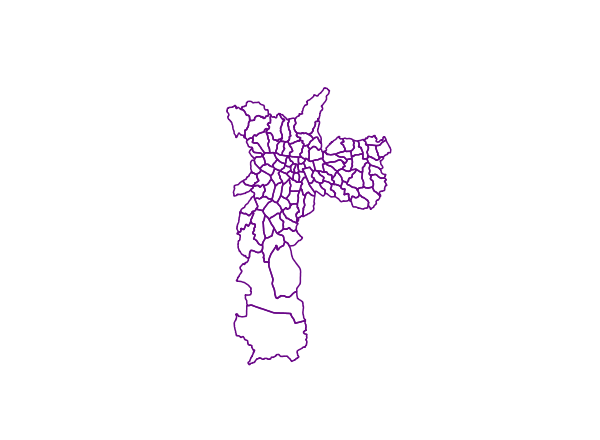

In [61]:
from IPython.display import Image
Image(img.read())

> Para saber mais sobre serviços do GeoSampa por Python:
* https://github.com/geoinfo-smdu/Inventario-GeoSampa
* https://github.com/geoinfo-smdu/educacao-3D
* https://github.com/geoinfo-smdu/lotes-m3dc

## Os papéis do GeoSampa

> Art. 6º, Decreto 57.770, de 03 de julho de 2017

* I - Simplificação de acesso
* II - Transparência e acesso público
* III - Garantir não sobreposição de informação



> "A insegurança e dúvidas devido a ausência de
descrição perimétrica dos mapas, mesmo que ainda não resolvidas no âmbito formal 107 ,
podem ser consideradas de certa forma superadas, uma vez que o acesso da sociedade
civil em geral ao mapa da legislação urbanística pelo portal GeoSampa permite controle
social sobre eventuais alterações ilegais."

SEO, He Nem Kim. O mapa e a lei: evolução do uso da cartografia na legislação urbaní­stica no municí­pio de São Paulo. text, Universidade de São Paulo, 2019. Disponível em: <http://www.teses.usp.br/teses/disponiveis/16/16139/tde-25072019-172657/>. Acesso em: 20 nov. 2020.


### Cidadania

> “em lugar do cidadão formou-se um consumidor, que aceita ser chamado  de  usuário” (SANTOS, 1987, p. 13)

SANTO, M. O espaço do cidadão.São Paulo: EDUSP, 1987



### Disseminação e fomento de uso

* Pesquisa
* Público em Geral
* Aplicações em geral (OSM e Licença)
* E o que eu estou fazendo aqui!

### Exemplo

> Qual o gênero mais frequente na denominação de nomes de ruas na cidade de São Paulo?

Gênero e Nomes de Rua – Medida SP. Disponível em: <https://medidasp.com/genero-ruas.html>. Acesso em: 20 nov. 2020.

* Feminino
* Masculino
* Indefinido

![](https://i.imgur.com/sGvAjvL.jpg)

## A espacialização dos atendimentos do SP156

* A natureza espacial do dado
* Seria esse um bom gatilho para o estimulo da cidadania?
* Heterogeneidade e complexidade da cidade
* SMIT e o fluxo procedimental do atendimento
* Dados abertos desde 2012

### O GeoProcessamento dos atendimentos

> https://github.com/geoinfo-smdu/geo-sp156

1. Dados CSV
2. Espacializar
    1. Lat/Long
    2. SQ (Setor/Quadra)
    3. Distrito
3. Estruturar os dados para a publicação
4. Temáticos


### Resultados preliminares

### Próximos Passos

### LiDAR 3D e os CEUs

* Inventário solicitado pela Secretaria da Educação
* Necessitavam de algo procedimental para levantar o inventário físico para contratação e zeladoria
* Será que é só o LiDAR 3D?